# EDS6340 - Introduction to Data Science - Project Phase 2

## Group 8
Madhukumar Gopal | 2354612 <br>
Kartheek Reddy Kancharla | 2317133 <br>
Nitin Hariprasad CV | 2344598 <br>
Navya Madhuri Bagireddy  | 2349675 <br>
Keerthi Reddy Rajamuri | 2353103 <br>


## Step 5: Feature selection step 2 also build (Based on the models compatibility with the data i.e classification or regression problem)

In [37]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning models
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
import statsmodels.api as sm


### Review the cleaned dataset from Phase 2

In [38]:
# Read the clean dataset
df = pd.read_csv("Group_8_Clean_Data.csv")

# Display the first few tuples of the dataset
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [39]:
# Display the column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

#### Split the features into predicted features and target feature

In [40]:
#splitting the data 
X = df.drop('DEFAULT', axis = 1)
y = df['DEFAULT']

#### Dataset splitted to Train (80%) and Test (20%)

In [41]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 7)

### Define functions to estimate the performance metrics


In [42]:
# Function for perfromance metric of data
def Perf_Metric(Actual_Ouput, Prediction_Output):
  # Actual_Ouput is the actual output of training data taken from the dataset
  # TrainData_Prediction is the predicted output from the model for the training data
  Accuracy = round(accuracy_score(Actual_Ouput, Prediction_Output),3)
  F1Score = round(f1_score(Actual_Ouput, Prediction_Output),3)
  Precision = round(precision_score(Actual_Ouput, Prediction_Output),3)
  Recall = round(recall_score(Actual_Ouput, Prediction_Output),3)
  return [Accuracy, F1Score, Precision, Recall]

In [43]:
# Get the training and test data for the selected features from Lasso
X_train
X_test

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1252,20000,2,1,2,22,0,0,0,0,0,...,16262,16749,13764,18732,1600,1550,1000,1000,5283,0
10444,10000,2,2,1,22,-1,-1,-1,0,0,...,9159,9363,8160,7552,390,9159,700,279,1000,800
8994,50000,1,1,2,30,0,0,2,2,2,...,45393,49351,45473,48595,6012,10,8212,1200,4008,4407
7463,360000,1,3,2,34,-1,-1,-1,-1,-1,...,944,1219,2216,1440,1937,944,1219,2216,2000,648
1910,360000,1,1,1,38,-1,-1,-1,-1,-1,...,390,390,390,390,0,390,390,390,390,390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5732,200000,1,1,1,44,-1,-1,-1,-1,-1,...,21133,2941,8191,22842,1582,21133,2941,8191,22842,5567
19252,280000,2,1,2,30,0,0,0,0,0,...,48190,48758,49219,58412,10300,10018,10026,5000,10000,2401
6976,30000,1,2,2,27,0,0,0,0,0,...,28503,27525,27630,0,1908,1200,2,835,0,0
15876,50000,2,2,2,23,0,0,0,0,0,...,10103,9763,9592,7797,1500,1500,1500,1500,1200,1300


# Performing few more machine learning model training

XG Boost

In [44]:
# Fit the model from taining data using XG Boost
xgb_model = XGBClassifier(n_estimators=1000 ,random_state=42)
xgb = xgb_model.fit(X_train, y_train)

# Model fit with training data
y_train_predict = xgb.predict(X_train)
# Make predictions on the test data
y_pred = xgb.predict(X_test)

# Evaluate performance metrics
Train_PM = Perf_Metric(y_train,y_train_predict)
Test_PM = Perf_Metric(y_test,y_pred)

XGB_Train_PM = Train_PM
XGB_Test_PM = Test_PM

# Create a table comparing the preformance on training and test data
models = pd.DataFrame({
    #'Model': ['Logistic Regression'],
    'Dataset': ["Train","Test"],
    'Accuracy Score': [Train_PM[0], Test_PM[0]],
    'F1 Score': [Train_PM[1], Test_PM[1]],
    'Precision': [Train_PM[2], Test_PM[2]],
    'Recall': [Train_PM[3], Test_PM[3]],
})
models

,Dataset,Accuracy Score,F1 Score,Precision,Recall
0,Train,0.997,0.992,0.997,0.988
1,Test,0.801,0.445,0.554,0.371


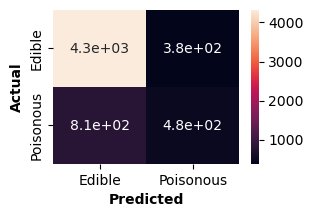

In [45]:
# Plot Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(3, 2))
sns.heatmap(cm,
           annot=True,
           annot_kws={"size":10},
           xticklabels=['Edible', 'Poisonous'],
           yticklabels=['Edible', 'Poisonous'],)
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('Actual',fontweight='bold');

## Extreme Machine Larning Model

#### Extreme ML Model is a Deep Learning model that consists of two or more hidden layers. The deeper the model (number of layers) the model has, the better the model is at learning the dataset. The model has an input layer that takes in the newly shaped independent variables, and a single output neuron that decides the binary classification.

In [46]:
!pip install scikeras
from tensorflow.keras import models, datasets, layers, optimizers
#from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
from scikeras.wrappers import KerasClassifier

# Function to build ann model
def build_ann():
  # creating the layers of the NN
  ann = models.Sequential()
  ann.add(layers.Input(shape=(len(X_train.columns), )))
  ann.add(layers.Dense(units=56, activation='relu'))
  ann.add(layers.Dense(units=128, activation='relu'))
  ann.add(layers.Dense(units=256, activation='relu'))
  ann.add(layers.Dense(units=128, activation='relu'))
  ann.add(layers.Dense(units=56, activation='relu'))
  ann.add(layers.Dense(units=1, activation='sigmoid'))
  ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return ann

model = KerasClassifier(build_fn=build_ann)
# Set params to test for in GridSeach
params={'batch_size':[200, 250],
        'epochs':[15, 20, 25]
        }

# Instantiate the RandomizedSearchCV object:
random_search_ann = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter = 4)

# Fit trained dataset with the best seeacrh
random_search_ann.fit(X_train, y_train)

C:\Users\karth\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6910 - loss: 295.1374
Epoch 2/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6905 - loss: 54.0487
Epoch 3/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6983 - loss: 25.0560
Epoch 4/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6879 - loss: 30.4561
Epoch 5/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6936 - loss: 20.1330
Epoch 6/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6960 - loss: 21.0370
Epoch 7/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6943 - loss: 16.4691
Epoch 8/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6881 - loss: 12.9992
Epoch 9/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7024 - loss: 9.5517
Epoch 10/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6886 - loss: 11.3317
Epoch 11/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6953 - loss: 9.3178
Epoch 12/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0

C:\Users\karth\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6715 - loss: 1127.7588
Epoch 2/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6658 - loss: 61.1606
Epoch 3/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6868 - loss: 33.2994
Epoch 4/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6905 - loss: 29.0123
Epoch 5/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6951 - loss: 20.8906
Epoch 6/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6996 - loss: 17.6020
Epoch 7/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6924 - loss: 21.4289
Epoch 8/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6954 - loss: 16.6298
Epoch 9/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6993 - loss: 9.9126
Epoch 10/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7089 - loss: 7.3764
Epoch 11/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7021 - loss: 10.0161
Epoch 12/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 

C:\Users\karth\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6723 - loss: 1125.9709
Epoch 2/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6845 - loss: 91.6713
Epoch 3/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6856 - loss: 64.0625
Epoch 4/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6810 - loss: 53.0340
Epoch 5/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6957 - loss: 35.2497
Epoch 6/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6948 - loss: 30.7202
Epoch 7/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7041 - loss: 27.6226
Epoch 8/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7084 - loss: 12.1754
Epoch 9/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7022 - loss: 21.1165
Epoch 10/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6927 - loss: 11.1116
Epoch 11/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7055 - loss: 9.5996
Epoch 12/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7005 - l

C:\Users\karth\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6670 - loss: 794.8362
Epoch 2/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6761 - loss: 79.2897
Epoch 3/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6951 - loss: 54.4553
Epoch 4/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6818 - loss: 48.2098
Epoch 5/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6939 - loss: 31.3318
Epoch 6/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7046 - loss: 23.9122
Epoch 7/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6902 - loss: 18.1461
Epoch 8/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6917 - loss: 16.2809
Epoch 9/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6995 - loss: 20.3354
Epoch 10/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7042 - loss: 13.4221
Epoch 11/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7008 - loss: 11.3810
Epoch 12/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy:

C:\Users\karth\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6625 - loss: 881.3046
Epoch 2/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6834 - loss: 149.8892
Epoch 3/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6842 - loss: 86.5710
Epoch 4/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6958 - loss: 98.2665
Epoch 5/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6966 - loss: 46.9676
Epoch 6/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6860 - loss: 50.5741
Epoch 7/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7000 - loss: 35.8770
Epoch 8/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6911 - loss: 41.6537
Epoch 9/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7047 - loss: 24.3539
Epoch 10/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6869 - loss: 24.4410
Epoch 11/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6956 - loss: 17.6870
Epoch 12/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6982 - 

C:\Users\karth\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6713 - loss: 904.9088
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6911 - loss: 33.3766
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7016 - loss: 29.7398
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6837 - loss: 21.5347
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6939 - loss: 12.2178
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6953 - loss: 19.6326
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6986 - loss: 8.7546
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6968 - loss: 11.0984
Epoch 9/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7034 - loss: 5.0171
Epoch 10/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6890 - loss: 4.8709
Epoch 11/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6968 - loss: 3.9947
Epoch 12/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6973 - loss:

C:\Users\karth\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6758 - loss: 747.3267
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6883 - loss: 49.5261
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6986 - loss: 52.7320
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6948 - loss: 28.4881
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6964 - loss: 21.5139
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7012 - loss: 22.9089
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7032 - loss: 11.6632
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7105 - loss: 10.3764
Epoch 9/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6890 - loss: 11.2676
Epoch 10/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6985 - loss: 7.3045
Epoch 11/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7071 - loss: 7.2449
Epoch 12/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0

C:\Users\karth\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6843 - loss: 704.8275
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6871 - loss: 66.5676
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6986 - loss: 48.3843
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6980 - loss: 28.3135
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6949 - loss: 26.3332
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6953 - loss: 22.8747
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6936 - loss: 13.8717
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6957 - loss: 10.8544
Epoch 9/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6970 - loss: 8.0025
Epoch 10/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7046 - loss: 10.1221
Epoch 11/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7069 - loss: 5.5100
Epoch 12/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 

C:\Users\karth\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6739 - loss: 627.8874
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6976 - loss: 58.4187
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6882 - loss: 29.5687
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6972 - loss: 23.8551
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6979 - loss: 15.8549
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6969 - loss: 15.8947
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7026 - loss: 10.3016
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6956 - loss: 10.7901
Epoch 9/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7026 - loss: 8.2214
Epoch 10/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6945 - loss: 7.4052
Epoch 11/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6986 - loss: 7.7914
Epoch 12/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7106 - loss

C:\Users\karth\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6817 - loss: 331.8402
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6889 - loss: 71.8668
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6865 - loss: 29.0872
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6946 - loss: 18.8772
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7051 - loss: 18.6395
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7056 - loss: 10.4512
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7014 - loss: 9.5308
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7090 - loss: 6.4847
Epoch 9/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7078 - loss: 5.2308
Epoch 10/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7049 - loss: 5.9914
Epoch 11/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7007 - loss: 5.6962
Epoch 12/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6923 - loss: 

C:\Users\karth\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6676 - loss: 1128.8209
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6890 - loss: 56.4278
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7069 - loss: 99.5358 
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6915 - loss: 42.7005
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6842 - loss: 34.8979
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7015 - loss: 23.3807
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6776 - loss: 26.6572
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6920 - loss: 11.1117
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7096 - loss: 12.8352
Epoch 10/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7036 - loss: 11.9200
Epoch 11/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7073 - loss: 9.1277
Epoch 12/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7099 - 

C:\Users\karth\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6712 - loss: 881.7036
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6954 - loss: 88.9561
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6840 - loss: 64.3750
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6931 - loss: 65.7436
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6770 - loss: 53.7720
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6954 - loss: 25.3274
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7016 - loss: 16.3399
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7023 - loss: 21.1346
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7052 - loss: 24.8922
Epoch 10/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7026 - loss: 10.1831
Epoch 11/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7074 - loss: 13.1763
Epoch 12/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6878 - l

C:\Users\karth\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6719 - loss: 1122.0215
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6912 - loss: 78.7106
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6901 - loss: 60.5001
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6903 - loss: 29.8453
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6925 - loss: 22.6750
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6997 - loss: 18.4501
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6924 - loss: 20.6468
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6986 - loss: 14.8298
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7082 - loss: 13.0304
Epoch 10/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6970 - loss: 9.1638
Epoch 11/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6807 - loss: 10.9112
Epoch 12/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7075 - l

C:\Users\karth\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6868 - loss: 549.9650
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6888 - loss: 62.0522
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6999 - loss: 39.3842
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6891 - loss: 37.5996
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6856 - loss: 21.1868
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6934 - loss: 15.9726
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7109 - loss: 13.1733
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6896 - loss: 11.0080
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6885 - loss: 10.4938
Epoch 10/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7013 - loss: 6.8129
Epoch 11/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6936 - loss: 6.9690
Epoch 12/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6907 - los

C:\Users\karth\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6838 - loss: 636.9810
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6877 - loss: 139.8269
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6921 - loss: 42.2483
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6865 - loss: 28.5795
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6907 - loss: 26.4191
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6965 - loss: 18.1189
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7035 - loss: 23.7810
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6994 - loss: 9.6781
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7037 - loss: 11.6405
Epoch 10/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7007 - loss: 8.7982
Epoch 11/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 6.9204
Epoch 12/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6908 - los

C:\Users\karth\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6770 - loss: 1169.0260
Epoch 2/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6938 - loss: 110.9087
Epoch 3/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6783 - loss: 43.8730
Epoch 4/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6926 - loss: 36.9049
Epoch 5/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6858 - loss: 30.7030
Epoch 6/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7033 - loss: 23.1277
Epoch 7/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6930 - loss: 15.8024
Epoch 8/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6924 - loss: 15.8563
Epoch 9/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6971 - loss: 14.0184
Epoch 10/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6918 - loss: 10.5403
Epoch 11/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6907 - loss: 11.7138
Epoch 12/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7065 -

C:\Users\karth\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6809 - loss: 485.1222
Epoch 2/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6938 - loss: 97.6974
Epoch 3/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6884 - loss: 47.8895
Epoch 4/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7022 - loss: 31.6401
Epoch 5/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7076 - loss: 24.8787
Epoch 6/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7033 - loss: 24.0857
Epoch 7/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6945 - loss: 18.3610
Epoch 8/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7035 - loss: 17.8035
Epoch 9/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6938 - loss: 13.1516
Epoch 10/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7123 - loss: 9.8226
Epoch 11/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7037 - loss: 8.6738
Epoch 12/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7163 - los

C:\Users\karth\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6509 - loss: 1065.7136
Epoch 2/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6867 - loss: 60.0848
Epoch 3/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6879 - loss: 52.7354
Epoch 4/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6989 - loss: 23.2286
Epoch 5/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7003 - loss: 17.4009
Epoch 6/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7013 - loss: 19.4060
Epoch 7/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6996 - loss: 17.4890
Epoch 8/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6944 - loss: 11.0837
Epoch 9/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7004 - loss: 12.6881
Epoch 10/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7072 - loss: 6.3674
Epoch 11/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7006 - loss: 9.3487
Epoch 12/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6980 - lo

C:\Users\karth\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6597 - loss: 1184.1904
Epoch 2/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6867 - loss: 57.0011
Epoch 3/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6881 - loss: 51.2365
Epoch 4/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6971 - loss: 36.8673
Epoch 5/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6910 - loss: 28.8389
Epoch 6/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6826 - loss: 16.0171
Epoch 7/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7062 - loss: 10.7243
Epoch 8/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6936 - loss: 9.0005
Epoch 9/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6849 - loss: 8.2442
Epoch 10/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6983 - loss: 7.0067
Epoch 11/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7029 - loss: 6.3872
Epoch 12/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7105 - loss

C:\Users\karth\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6648 - loss: 670.9803
Epoch 2/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7017 - loss: 48.6247
Epoch 3/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6848 - loss: 50.7907
Epoch 4/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6931 - loss: 37.2373
Epoch 5/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6809 - loss: 30.9103
Epoch 6/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6974 - loss: 16.2512
Epoch 7/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6981 - loss: 10.8708
Epoch 8/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6902 - loss: 10.6247
Epoch 9/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7066 - loss: 7.7113
Epoch 10/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7016 - loss: 7.2099
Epoch 11/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7036 - loss: 7.1198
Epoch 12/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7015 - loss

C:\Users\karth\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6625 - loss: 908.5302
Epoch 2/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6979 - loss: 42.8674
Epoch 3/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6969 - loss: 53.0162
Epoch 4/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6903 - loss: 36.9975
Epoch 5/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6905 - loss: 36.3707
Epoch 6/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6950 - loss: 31.9796
Epoch 7/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6953 - loss: 18.7279
Epoch 8/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7032 - loss: 10.9597
Epoch 9/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7127 - loss: 14.4634
Epoch 10/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6995 - loss: 10.4718
Epoch 11/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6988 - loss: 9.9701 
Epoch 12/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy

RandomizedSearchCV(estimator=KerasClassifier(build_fn=<function build_ann at 0x0000029BCDF672E0>),
                   n_iter=4,
                   param_distributions={'batch_size': [200, 250],
                                        'epochs': [15, 20, 25]})

In [47]:
# Get the best ANN parameters
params = random_search_ann.best_params_
params

{'epochs': 25, 'batch_size': 250}

In [48]:
# Best ANN estimator
estimator = random_search_ann.best_estimator_
estimator

KerasClassifier(
	model=None
	build_fn=<function build_ann at 0x0000029BCDF672E0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=250
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=25
	class_weight=None
)

In [49]:
# Train the best ANN model with train data
estimator.fit(X_train, y_train)

C:\Users\karth\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6549 - loss: 1631.2799
Epoch 2/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6833 - loss: 56.7336
Epoch 3/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6926 - loss: 55.9143
Epoch 4/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7009 - loss: 44.0334
Epoch 5/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6860 - loss: 29.1105
Epoch 6/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6909 - loss: 18.4899
Epoch 7/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6937 - loss: 17.4264
Epoch 8/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6928 - loss: 9.8784
Epoch 9/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7012 - loss: 10.5334
Epoch 10/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6907 - loss: 10.8402
Epoch 11/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6902 - loss: 10.0193
Epoch 12/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy

KerasClassifier(
	model=None
	build_fn=<function build_ann at 0x0000029BCDF672E0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=250
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=25
	class_weight=None
)

In [50]:
# Prediction with test data
predictions = estimator.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [51]:
accuracy_EML_best = accuracy_score(y_test, predictions)*100
print(f'Extreme ML Model Accuracy with Hyperparameters {random_search_ann.best_params_} : {round(accuracy_EML_best,3)}')

Extreme ML Model Accuracy with Hyperparameters {'epochs': 25, 'batch_size': 250} : 40.4


## Deep Learning Model with two hidden layers - Each hidden layer with 100 neurons

In [52]:
# Define neural network with two hidden layers
model = MLPClassifier(hidden_layer_sizes=(100,100))
nn = model.fit(X_train, y_train)



In [53]:
# Model fit with training data
y_train_predict = nn.predict(X_train)
# Make predictions on the test data
y_pred = nn.predict(X_test)

# Evaluate performance metric for training and testing data
Train_PM = Perf_Metric(y_train,y_train_predict)
Test_PM = Perf_Metric(y_test,y_pred)

NN_Train_PM = Train_PM
NN_Test_PM = Test_PM

In [54]:
# Create a table comparing the preformance on training and test data
models = pd.DataFrame({
    #'Model': ['RF'],
    'Dataset': ["Train","Test"],
    'Accuracy Score': [Train_PM[0], Test_PM[0]],
    'F1 Score': [Train_PM[1], Test_PM[1]],
    'Precision': [Train_PM[2], Test_PM[2]],
    'Recall': [Train_PM[3], Test_PM[3]],
})
models

,Dataset,Accuracy Score,F1 Score,Precision,Recall
0,Train,0.778,0.049,0.539,0.026
1,Test,0.783,0.038,0.406,0.020


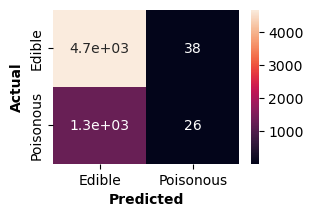

In [55]:
# Plot Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(3, 2))
sns.heatmap(cm,
           annot=True,
           annot_kws={"size":10},
           xticklabels=['Edible', 'Poisonous'],
           yticklabels=['Edible', 'Poisonous'],)
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('Actual',fontweight='bold');

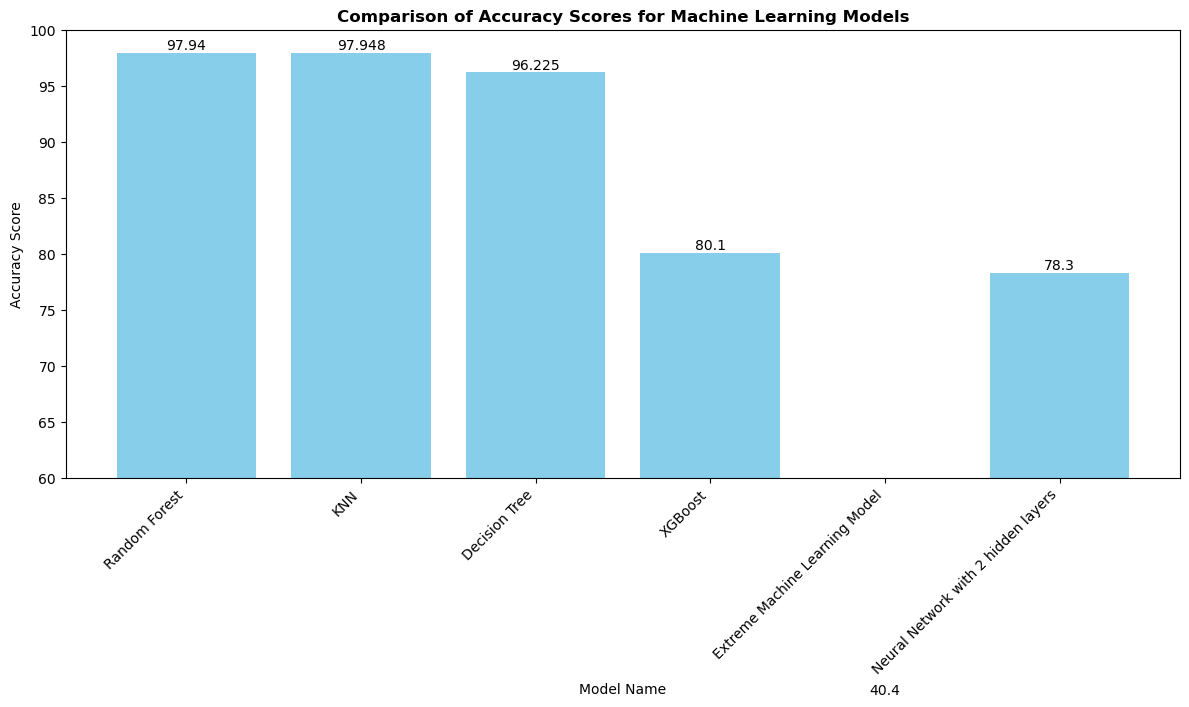

In [56]:
import matplotlib.pyplot as plt

# Comparison of machine learning models with selected features from Step 2
mlmodel_names = ["Random Forest", "KNN", "Decision Tree", "XGBoost", "Extreme Machine Learning Model", "Neural Network with 2 hidden layers"]
mlmodel_acc = [97.940, 97.948, 96.225, round(XGB_Test_PM[0]*100, 3), round(accuracy_EML_best, 3), round((NN_Test_PM[0]*100), 3)]

# Plot the bar graph using matplotlib
plt.figure(figsize=(12, 8))  # Increased figure size
bars = plt.bar(mlmodel_names, mlmodel_acc, color='skyblue')

plt.title('Comparison of Accuracy Scores for Machine Learning Models', fontsize=12, fontweight='bold')
plt.xlabel('Model Name', fontsize=10)
plt.ylabel('Accuracy Score', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better visibility

# Adding value labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom', fontsize=10)

plt.ylim([60, 100])  # Adjust y-axis limit for better visualization
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


Observations: Random Forest, KNN, and XGBoost are found to be giving high accuracy. So these three models are considered for ensembling

## Ensemble model with Random Forest, KNN and XGBoost

In [57]:
# Define top three machine learning in accuracy for ensembling
M1 = RandomForestClassifier(n_estimators= 100, min_samples_split= 10, min_samples_leaf = 1, max_depth= 30)
M2 = KNeighborsClassifier(weights ='distance', p = 1, n_neighbors = 7)
M3 = XGBClassifier(n_estimators=1000 ,random_state=42)

# Assign weights to three machine learning models
eclf = VotingClassifier(estimators=[('rf', M1 ), ('knn', M2), ('xgb', M3)], voting='hard', weights=[4,4,2])

# Fir the model
eclf.fit(X_train, y_train)

#Model fit with trainig data
y_train_ensemble_predict = eclf.predict(X_train)

#Model predictions on the test data
y_pred_ensemble = eclf.predict(X_test)

In [58]:
# Evaluate performance metric for training and testing data
Train_PM = Perf_Metric(y_train,y_train_ensemble_predict)
Test_PM = Perf_Metric(y_test,y_pred_ensemble)

Ensemble_Train_PM = Train_PM
Ensemble_Test_PM = Test_PM

In [59]:
# Create a table comparing the preformance on training and test data
models = pd.DataFrame({
    #'Model': ['RF'],
    'Dataset': ["Train","Test"],
    'Accuracy Score': [Train_PM[0], Test_PM[0]],
    'F1 Score': [Train_PM[1], Test_PM[1]],
    'Precision': [Train_PM[2], Test_PM[2]],
    'Recall': [Train_PM[3], Test_PM[3]],
})
models

,Dataset,Accuracy Score,F1 Score,Precision,Recall
0,Train,0.997,0.994,0.999,0.988
1,Test,0.813,0.436,0.619,0.336
